In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings

warnings.filterwarnings('ignore')

np.set_printoptions(suppress=True) #수치형값 순정으로 나오

In [11]:
from sklearn.datasets import load_boston
data = load_boston()

df = pd.DataFrame(data['data'], columns = data['feature_names'])
df['MEDV'] = data['target']
x_train, x_valid, y_train, y_valid = train_test_split(df.drop('MEDV',1), df['MEDV'])

#모델별 성능 확인을 위한 함수

import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_valid})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

In [12]:
x_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.612116,11.645119,11.246728,0.076517,0.552342,6.265712,68.141161,3.795945,9.406332,407.131926,18.455673,354.367704,12.598153
std,8.867047,23.223211,6.926847,0.266175,0.115876,0.671864,28.268051,2.148528,8.628338,166.870442,2.137245,94.845313,7.218680
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081065,0.000000,5.190000,0.000000,0.448000,5.888000,42.350000,2.049300,4.000000,280.500000,17.400000,374.495000,7.065000
50%,0.253870,0.000000,9.900000,0.000000,0.538000,6.209000,76.900000,3.182700,5.000000,330.000000,19.000000,391.340000,10.870000
75%,3.504645,20.000000,18.100000,0.000000,0.624000,6.611000,93.900000,5.213250,24.000000,666.000000,20.200000,396.260000,16.775000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [13]:
#StandardScaler
"""
평균을 0으로 표준편차를 1로 만들어줌
"""

'\n평균을 0으로 표준편차를 1로 만들어줌\n'

In [15]:
std_scaler = StandardScaler()

In [16]:
std_scaled = std_scaler.fit_transform(x_train)

In [17]:
round(pd.DataFrame(std_scaled).describe(),2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.41,-0.50,-1.56,-0.29,-1.45,-4.03,-2.31,-1.24,-0.98,-1.32,-2.74,-3.74,-1.51
25%,-0.40,-0.50,-0.88,-0.29,-0.90,-0.56,-0.91,-0.81,-0.63,-0.76,-0.49,0.21,-0.77
50%,-0.38,-0.50,-0.19,-0.29,-0.12,-0.08,0.31,-0.29,-0.51,-0.46,0.26,0.39,-0.24
75%,-0.01,0.36,0.99,-0.29,0.62,0.51,0.91,0.66,1.69,1.55,0.82,0.44,0.58
max,9.64,3.81,2.38,3.47,2.75,3.75,1.13,3.88,1.69,1.82,1.66,0.45,3.52


In [ ]:
#MinMaxScaler
"""
min값과 max값을 0~1사이로 정규화
"""

In [20]:
minmax_scaler = MinMaxScaler()

In [21]:
minmax_scaled = minmax_scaler.fit_transform(x_train)

In [22]:
round(pd.DataFrame(minmax_scaled).describe(),2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.04,0.12,0.40,0.08,0.34,0.52,0.67,0.24,0.37,0.42,0.62,0.89,0.30
std,0.10,0.23,0.25,0.27,0.24,0.13,0.29,0.20,0.38,0.32,0.23,0.24,0.20
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.17,0.00,0.13,0.45,0.41,0.08,0.13,0.18,0.51,0.94,0.15
50%,0.00,0.00,0.35,0.00,0.31,0.51,0.76,0.19,0.17,0.27,0.68,0.99,0.25
75%,0.04,0.20,0.65,0.00,0.49,0.58,0.94,0.37,1.00,0.91,0.81,1.00,0.42
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [ ]:
#RobustScaler
"""
중앙값이 0, IQR이 1이 되도록 변환
outlier 값 처리에 유용
"""

In [23]:
robust_scaler = RobustScaler()
robust_scaler = robust_scaler.fit_transform(x_train)

In [24]:
round(pd.DataFrame(robust_scaler).median(),2)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
dtype: float64

In [ ]:
#파이프라인

In [27]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNet

In [28]:
elasticnet_pipeline = make_pipeline(
    StandardScaler(), #선언 
    ElasticNet(alpha = 0.1, l1_ratio = 0.2) #모델 정의
)

In [29]:
elasticnet_pred = elasticnet_pipeline.fit(x_train, y_train).predict(x_valid)

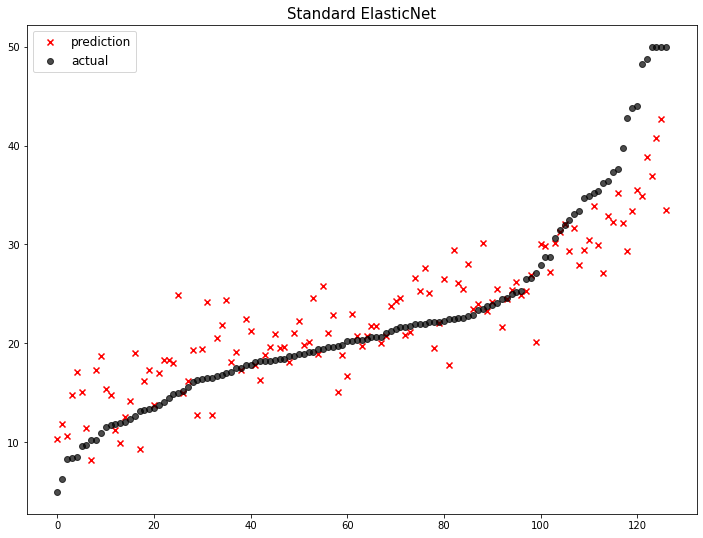

                 model        mse
0  Standard ElasticNet  22.660073


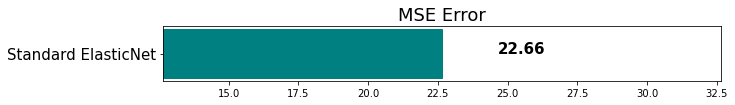

In [30]:
mse_eval('Standard ElasticNet',elasticnet_pred, y_valid)